In [1]:
using DataFrames
using Gadfly

In [2]:
benchmarks = readtable("benchmarks.csv", header=false, names=[:language, :benchmark, :time])
cdata = benchmarks[benchmarks[:language].== "C", :]
benchmarks = join(benchmarks, cdata, on=:benchmark)
delete!(benchmarks, :language_1)
rename!(benchmarks, :time_1, :ctime)
benchmarks[:normtime] = benchmarks[:time] ./ benchmarks[:ctime];

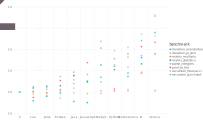

In [3]:
p = plot(benchmarks,
    x = :language,
    y = :normtime,
    color = :benchmark,
    Scale.y_log10,
    Guide.ylabel(nothing),
    Guide.xlabel(nothing),
    Coord.Cartesian(xmin=1,xmax=11.5,ymin=-1,ymax=4),
    Theme(
        guide_title_position = :left,
        colorkey_swatch_shape = :circle,
        minor_label_font = "Georgia",
        major_label_font = "Georgia",
    ),
)
draw(SVG(8inch,8inch/golden), p)

In [6]:
draw(SVG("_includes/benchmarks.svg", 8inch, inch/golden), p)

false

In [5]:
for lang in ["C", "Lua", "Julia", "Fortran", "Java", "Javascript", "Matlab", 
        "Python", "Mathematica", "R", "Octave"]
    data = benchmarks[benchmarks[:language].== lang, :]
    gmean = geomean(data[:normtime])
    @show lang, gmean
end

(lang, gmean) = ("C", 1.0)
(lang, gmean) = ("Lua", 0.9317569314366417)
(lang, gmean) = ("Julia", 1.0391641749349996)
(lang, gmean) = ("Fortran", 1.5197137939246654)
(lang, gmean) = ("Java", 2.496683779219207)
(lang, gmean) = ("Javascript", 10.36010862341479)
(lang, gmean) = ("Matlab", 10.487007830859199)
(lang, gmean) = ("Python", 11.564712410802159)
(lang, gmean) = ("Mathematica", 11.66842394271694)
(lang, gmean) = ("R", 52.44970864733156)
(lang, gmean) = ("Octave", 429.76138556801965)
